# ZIMNAT INSURANCE RECOMMENDATION

In this notebook, we will predict for any customer an insurance product that might be useful to them given their current profile.
More precisely, there is a product missing for each customer, and we will make predictions around which products are most likely to be the missing product.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Train.csv to Train.csv


In [4]:
import io

In [5]:
df_train = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
df_train

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,1/9/2019,F,M,1974,748L,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29128,Y73ETTO,1/11/2018,M,M,1987,XX25,Q6J6,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29129,MVXG2LC,1/2/2019,M,M,1985,BOAS,6PE7,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
29130,BUQ8DQN,1/7/2019,M,M,1989,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Data description

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

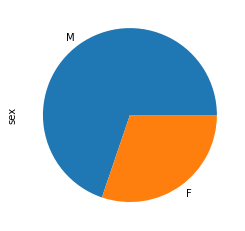

In [7]:
df_train['sex'].value_counts().plot.pie()

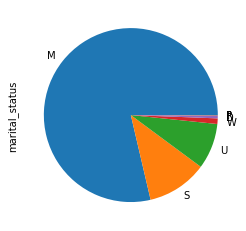

In [8]:
df_train['marital_status'].value_counts().plot.pie()

In [9]:
df_train['occupation_code'].value_counts()

2A7I    7089
0KID    3969
SST3    2711
UJ5T    2079
0OJM    1565
        ... 
4M0E       1
PPNK       1
5LNN       1
URYD       1
59QM       1
Name: occupation_code, Length: 233, dtype: int64

There are **233** kinds of occupation code

In [10]:
df_train['occupation_category_code'].value_counts()

T4MS    18619
90QI     5552
56SI     3655
L44T      628
JD7X      576
AHH5      102
Name: occupation_category_code, dtype: int64

Just **6** categories of occupation code

In [11]:
df_train['join_date'] = pd.to_datetime(df_train['join_date'])

In [12]:
df_train['join_date'].value_counts()

2018-01-05    1319
2019-01-05    1199
2018-01-04    1123
2019-01-04    1043
2019-01-01     754
              ... 
2013-05-23       1
2012-02-09       1
2012-10-22       1
2013-11-01       1
2012-08-09       1
Name: join_date, Length: 132, dtype: int64

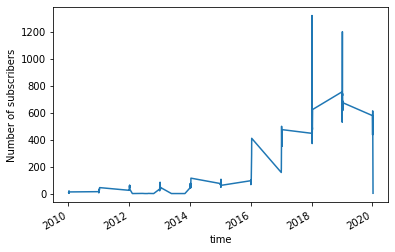

In [13]:
plt.plot(df_train['join_date'].value_counts().sort_index().index, df_train['join_date'].value_counts().sort_index())
plt.gcf().autofmt_xdate()
plt.ylabel("Number of subscribers")
plt.xlabel("time")
plt.rcParams["figure.figsize"] = (12,12)
plt.show()


We can observe that Zimnat Insurance was trending in **2018** and **2019**

### About targets

Since we are looking for what product might be useful for one customer, let's have a look atthe trend of all of the products

In [14]:
df_train.columns

Index(['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'],
      dtype='object')

Let's count how many sells have been made for each product

In [15]:
product_count_list = []
for col in df_train.columns[8:]:
    product_count_list.append([col, df_train[col].value_counts()[1]])

product_count = pd.DataFrame(product_count_list, columns=['product', 'sells'])
product_count

,product,sells
0,P5DA,40
1,RIBP,1780
2,8NN1,157
3,7POT,316
4,66FJ,339
5,GYSR,4
6,SOP4,431
7,RVSZ,25328
8,PYUQ,2173
9,LJR9,354


In [16]:
product_count.sort_values(by=['sells'])

,product,sells
5,GYSR,4
0,P5DA,40
13,FM3X,110
2,8NN1,157
16,JWFN,311
3,7POT,316
12,BSTQ,324
4,66FJ,339
9,LJR9,354
6,SOP4,431


We can see that the product which has  the code **RVSZ** is the best seller along the **K6QO**

In [17]:
#Adding amount of purchased products for each client(for test without 1 missing)

df_train['sum'] = df_train.iloc[:, 8:].T.sum()

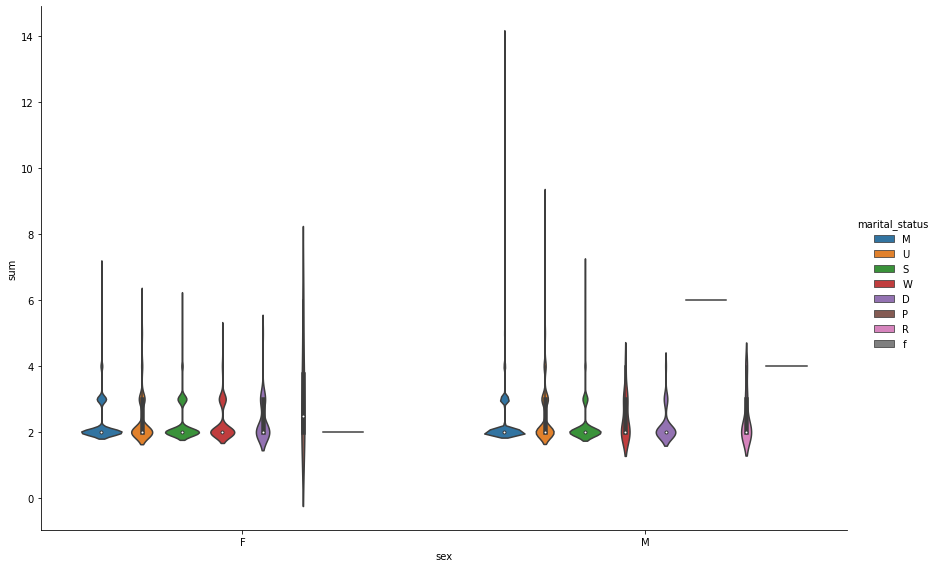

In [18]:
sns.catplot(x="sex", y="sum", hue="marital_status", kind="violin", data=df_train, height=8, aspect=1.5)

In [19]:
df_train['birth_year'].value_counts().sort_index()

1932     1
1936     1
1938     1
1946     1
1947     2
        ..
2000    40
2001    11
2002     2
2005     1
2011     1
Name: birth_year, Length: 61, dtype: int64

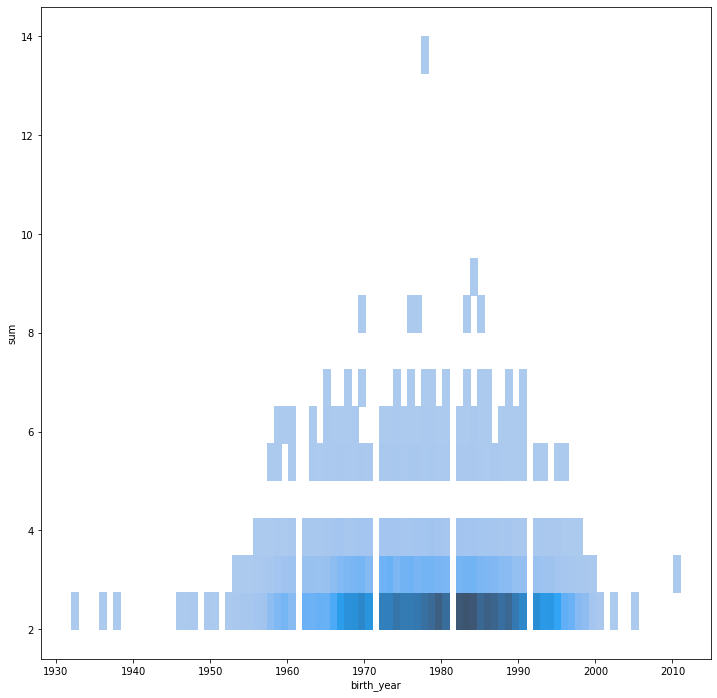

In [20]:
sns.histplot(data= df_train, x="birth_year", y="sum")

## Data preprocessing

In [21]:
uploaded = files.upload()

Saving Test.csv to Test.csv


In [22]:
test = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
test

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,1/12/2018,M,M,1984,94KC,DZRV,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H6141K3,1/10/2019,M,M,1996,1X1H,J9SY,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,1/1/2020,F,W,1968,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,1/2/2019,M,M,1989,94KC,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,1/2/2020,F,M,1982,UAOD,0KID,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0GMU5UH,1/4/2019,F,M,1986,748L,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9996,I9W11CD,1/8/2019,M,M,1980,UAOD,0KID,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,42WTEGT,1/4/2018,M,M,1993,748L,SST3,56SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9998,8EKC4O9,1/5/2015,F,U,1981,49BM,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Feature Engineering


In [23]:
import copy

Since we are predicting only **one** missing product, the problem is transformed from a **multi-label classification** to a **multi-class classification** as we will create a target column from all present product for each customer ID.
source https://github.com/asumgh/Zimnat_Insurance_top-12/blob/master/Zimnat-lgb_best_score.ipynb

In [24]:
X_train = []
X_train_columns = df_train.columns[:-1]



for line in df_train.values:

    info = line[:8]
    info_products = line[8:-1]
    indexes = [k for k, i in enumerate(info_products) if i == 1]

    for i in indexes:
        for k in range(len(info_products)):

            if k == i:

                info_products_transformed = list(copy.copy(info_products))
                info_products_transformed[i] = 0

                X_train.append(
                    list(info) + info_products_transformed +
                    [X_train_columns[8 + k]] )

X_train = pd.DataFrame(X_train)
X_train.columns = [
    'ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
    'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
    '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
    'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3',
    'target'
]
train = X_train.copy()

In [25]:
#Make info about true values in data of predictions

X_test = []
true_values = []
for line in test.values:

    info = line[:8]
    info_products = line[8:]
    indexes = [k for k, i in enumerate(info_products) if i == 1]

    X_test.append(list(info) + list(info_products))

    for true in test.columns[8:][indexes]:
        true_values.append(line[0] + ' X ' + true)

X_test = pd.DataFrame(X_test)
X_test.columns = [
    'ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
    'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
    '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
    'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3',
]
test = X_test.copy()

In [26]:
train

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,target
0,4WKQSBB,2019-01-02,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,RVSZ
1,4WKQSBB,2019-01-02,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,K6QO
2,CP5S02H,2019-01-06,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,RVSZ
3,CP5S02H,2019-01-06,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,K6QO
4,2YKDILJ,2013-01-06,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,SOP4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66348,MVXG2LC,2019-01-02,M,M,1985,BOAS,6PE7,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,K6QO
66349,BUQ8DQN,2019-01-07,M,M,1989,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,RVSZ
66350,BUQ8DQN,2019-01-07,M,M,1989,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,K6QO
66351,DEJBWYU,2020-01-03,M,M,1975,94KC,31JW,90QI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,RVSZ


In [27]:
#Adding amount of purchased products for each sample

train['sum'] = train.iloc[:, 8:29].T.sum()
test['sum'] = test.iloc[:, 8:].T.sum()
test['sum'] += 1

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66353 entries, 0 to 66352
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        66353 non-null  object        
 1   join_date                 66346 non-null  datetime64[ns]
 2   sex                       66353 non-null  object        
 3   marital_status            66353 non-null  object        
 4   birth_year                66353 non-null  int64         
 5   branch_code               66353 non-null  object        
 6   occupation_code           66353 non-null  object        
 7   occupation_category_code  66353 non-null  object        
 8   P5DA                      66353 non-null  int64         
 9   RIBP                      66353 non-null  int64         
 10  8NN1                      66353 non-null  int64         
 11  7POT                      66353 non-null  int64         
 12  66FJ              

In [29]:
train['join_date'] = pd.to_datetime(train['join_date']).dt.date 
test['join_date'] = pd.to_datetime(test['join_date']).dt.date 

In [30]:
train['join_date']

0        2019-01-02
1        2019-01-02
2        2019-01-06
3        2019-01-06
4        2013-01-06
            ...    
66348    2019-01-02
66349    2019-01-07
66350    2019-01-07
66351    2020-01-03
66352    2020-01-03
Name: join_date, Length: 66353, dtype: object

In [31]:
test['join_date']

0       2018-01-12
1       2019-01-10
2       2020-01-01
3       2019-01-02
4       2020-01-02
           ...    
9995    2019-01-04
9996    2019-01-08
9997    2018-01-04
9998    2015-01-05
9999    2018-01-11
Name: join_date, Length: 10000, dtype: object

In [32]:
train['Join_Year'] = pd.to_datetime(train['join_date']).dt.year
test['Join_Year'] = pd.to_datetime(test['join_date']).dt.year

In [33]:
train['Join_Year']

0        2019.0
1        2019.0
2        2019.0
3        2019.0
4        2013.0
          ...  
66348    2019.0
66349    2019.0
66350    2019.0
66351    2020.0
66352    2020.0
Name: Join_Year, Length: 66353, dtype: float64

In [34]:
del train['join_date']

In [35]:
del test['join_date']

### Missing Values

In [36]:
train.isnull().mean().round(4).mul(100).sort_values()

ID                          0.00
target                      0.00
ECY3                        0.00
GHYX                        0.00
J9JW                        0.00
JZ9D                        0.00
JWFN                        0.00
QBOL                        0.00
K6QO                        0.00
FM3X                        0.00
BSTQ                        0.00
AHXO                        0.00
N2MW                        0.00
LJR9                        0.00
sum                         0.00
PYUQ                        0.00
SOP4                        0.00
GYSR                        0.00
66FJ                        0.00
7POT                        0.00
8NN1                        0.00
RIBP                        0.00
P5DA                        0.00
occupation_category_code    0.00
occupation_code             0.00
branch_code                 0.00
birth_year                  0.00
marital_status              0.00
sex                         0.00
RVSZ                        0.00
Join_Year 

In [37]:
test.isnull().mean().round(4).mul(100).sort_values()

ID                          0.00
ECY3                        0.00
GHYX                        0.00
J9JW                        0.00
JZ9D                        0.00
JWFN                        0.00
QBOL                        0.00
K6QO                        0.00
FM3X                        0.00
BSTQ                        0.00
AHXO                        0.00
N2MW                        0.00
LJR9                        0.00
PYUQ                        0.00
RVSZ                        0.00
SOP4                        0.00
GYSR                        0.00
66FJ                        0.00
7POT                        0.00
8NN1                        0.00
RIBP                        0.00
P5DA                        0.00
occupation_category_code    0.00
occupation_code             0.00
branch_code                 0.00
birth_year                  0.00
marital_status              0.00
sex                         0.00
sum                         0.00
Join_Year                   0.01
dtype: flo

In [38]:
train['Join_Year'].mode()[0]

2019.0

In [39]:
train = train.fillna(train['Join_Year'].mode()[0])

In [40]:
train.isnull().mean().round(4).mul(100)

ID                          0.0
sex                         0.0
marital_status              0.0
birth_year                  0.0
branch_code                 0.0
occupation_code             0.0
occupation_category_code    0.0
P5DA                        0.0
RIBP                        0.0
8NN1                        0.0
7POT                        0.0
66FJ                        0.0
GYSR                        0.0
SOP4                        0.0
RVSZ                        0.0
PYUQ                        0.0
LJR9                        0.0
N2MW                        0.0
AHXO                        0.0
BSTQ                        0.0
FM3X                        0.0
K6QO                        0.0
QBOL                        0.0
JWFN                        0.0
JZ9D                        0.0
J9JW                        0.0
GHYX                        0.0
ECY3                        0.0
target                      0.0
sum                         0.0
Join_Year                   0.0
dtype: f

In [41]:
test = test.fillna(test['Join_Year'].mode()[0])

In [42]:
train['Join_Year'] = train['Join_Year'].astype(int) 

In [43]:
test['Join_Year'] = test['Join_Year'].astype(int) 

## Model

Since it is a mulilabel classification problem (but now a multiclass classification problem), **CatboostClassifier** suits the problem well so we don't need to encode categorical features too but we just need to precise them.

In [44]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [45]:
from catboost import CatBoostClassifier

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66353 entries, 0 to 66352
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        66353 non-null  object
 1   sex                       66353 non-null  object
 2   marital_status            66353 non-null  object
 3   birth_year                66353 non-null  int64 
 4   branch_code               66353 non-null  object
 5   occupation_code           66353 non-null  object
 6   occupation_category_code  66353 non-null  object
 7   P5DA                      66353 non-null  int64 
 8   RIBP                      66353 non-null  int64 
 9   8NN1                      66353 non-null  int64 
 10  7POT                      66353 non-null  int64 
 11  66FJ                      66353 non-null  int64 
 12  GYSR                      66353 non-null  int64 
 13  SOP4                      66353 non-null  int64 
 14  RVSZ                  

In [47]:
cat_features = [
    'sex', 'marital_status', 'branch_code', 'occupation_category_code',
    'occupation_code', 'Join_Year'
]


In [48]:
X_train = train.drop(columns = ['ID', 'target'])
y_train = train.target


In [49]:
model_cat = CatBoostClassifier(
    **{
        'depth': 5,
        'n_estimators': 15000,
        'learning_rate': 0.01,
        'random_state': 567,
        'task_type': 'GPU',
        'thread_count': 1,
        'verbose': 100,
        'use_best_model': True,
    })

In [50]:
from sklearn.model_selection import GroupShuffleSplit

In [51]:
X_test = test.drop(columns=['ID'])

### Training 

In [52]:
probs = []
group_kfold = GroupShuffleSplit(n_splits=5, random_state = 42) #for cross validation
for train_index, test_index in group_kfold.split(X_train, y_train, np.array(train['ID'])):
    X_real_train, X_valid = X_train.iloc[train_index], X_train.iloc[test_index]
    y_real_train, y_valid = y_train.iloc[train_index], y_train.iloc[test_index]

    model_cat.fit(
        X_real_train,
        y_real_train,
        cat_features=cat_features,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=200,
    )
    proba = model_cat.predict_proba(X_test)
    probs.append(proba)

0:	learn: 2.9083612	test: 2.9081743	best: 2.9081743 (0)	total: 44.4ms	remaining: 11m 5s
100:	learn: 0.9617425	test: 0.9576722	best: 0.9576722 (100)	total: 3.92s	remaining: 9m 38s
200:	learn: 0.6894030	test: 0.6850042	best: 0.6850042 (200)	total: 9.36s	remaining: 11m 29s
300:	learn: 0.5837977	test: 0.5832888	best: 0.5832888 (300)	total: 16.4s	remaining: 13m 18s
400:	learn: 0.5348813	test: 0.5368536	best: 0.5368536 (400)	total: 25.5s	remaining: 15m 29s
500:	learn: 0.5053535	test: 0.5095284	best: 0.5095284 (500)	total: 34.1s	remaining: 16m 27s
600:	learn: 0.4853618	test: 0.4917805	best: 0.4917805 (600)	total: 37.5s	remaining: 14m 57s
700:	learn: 0.4689138	test: 0.4779692	best: 0.4779692 (700)	total: 40.8s	remaining: 13m 51s
800:	learn: 0.4565986	test: 0.4677502	best: 0.4677502 (800)	total: 44.1s	remaining: 13m 1s
900:	learn: 0.4474333	test: 0.4605136	best: 0.4605136 (900)	total: 47.4s	remaining: 12m 21s
1000:	learn: 0.4394399	test: 0.4545629	best: 0.4545629 (1000)	total: 50.7s	remaining: 

### Predictions on the test set

In [53]:
len(probs)

5

In [54]:
new_a = np.zeros((10000, 21))
for r in probs:
    new_a += r
new_a /= 5


In [55]:
y_pred = pd.DataFrame(new_a)


In [56]:
y_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.000147,0.000489,4.600742e-06,0.000184,0.000085,0.005016,1.116459e-05,0.003820,1.098985e-06,0.000206,0.000328,0.000176,0.972822,0.000224,0.000315,3.602635e-06,0.004190,0.010894,0.000473,0.000011,0.000599
1,0.000654,0.001047,5.784326e-05,0.001374,0.000997,0.229886,7.346866e-04,0.071249,4.931686e-06,0.001050,0.147724,0.001187,0.001979,0.001505,0.001874,3.148011e-05,0.009142,0.527814,0.000839,0.000253,0.000598
2,0.000412,0.000572,1.531675e-04,0.005960,0.000250,0.177818,1.309659e-05,0.008419,2.301322e-06,0.000320,0.015677,0.001487,0.000813,0.002277,0.014207,2.810769e-05,0.027223,0.742149,0.001291,0.000034,0.000891
3,0.000129,0.000051,6.171569e-06,0.000334,0.000080,0.006487,6.566691e-06,0.008903,1.237102e-06,0.000197,0.000352,0.000167,0.970227,0.000351,0.000711,3.112935e-06,0.001718,0.009044,0.000463,0.000014,0.000754
4,0.000012,0.000039,3.047026e-06,0.000076,0.000195,0.000221,5.255310e-06,0.000563,7.931090e-08,0.992268,0.000001,0.000530,0.000003,0.000134,0.000158,1.352515e-06,0.001748,0.002363,0.000026,0.001633,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000099,0.000038,4.821922e-06,0.000144,0.001642,0.000057,3.401169e-05,0.011216,8.549115e-07,0.981537,0.000003,0.000389,0.000008,0.000711,0.000974,5.669224e-06,0.000490,0.000011,0.000248,0.002301,0.000087
9996,0.000241,0.000091,2.662065e-05,0.000193,0.000197,0.004439,1.566514e-05,0.007612,1.455665e-06,0.000253,0.000165,0.000227,0.941255,0.000502,0.000448,1.355526e-05,0.005675,0.037706,0.000740,0.000010,0.000188
9997,0.000006,0.000005,2.170566e-07,0.000004,0.000008,0.000014,1.530973e-06,0.000038,6.943827e-08,0.000004,0.000002,0.000004,0.000004,0.000003,0.000016,6.026735e-07,0.000018,0.000039,0.000004,0.999814,0.000017
9998,0.017777,0.004119,1.955370e-02,0.502902,0.001023,0.019462,5.331413e-04,0.002593,2.655378e-04,0.000318,0.000542,0.000845,0.003902,0.005095,0.009270,1.210538e-02,0.079471,0.095478,0.057498,0.145800,0.021447


We have to decode the columns target.

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [59]:
y_pred.columns = le.inverse_transform(y_pred.columns)

In [60]:
y_pred

,66FJ,7POT,8NN1,AHXO,BSTQ,ECY3,FM3X,GHYX,GYSR,J9JW,JWFN,JZ9D,K6QO,LJR9,N2MW,P5DA,PYUQ,QBOL,RIBP,RVSZ,SOP4
0,0.000147,0.000489,4.600742e-06,0.000184,0.000085,0.005016,1.116459e-05,0.003820,1.098985e-06,0.000206,0.000328,0.000176,0.972822,0.000224,0.000315,3.602635e-06,0.004190,0.010894,0.000473,0.000011,0.000599
1,0.000654,0.001047,5.784326e-05,0.001374,0.000997,0.229886,7.346866e-04,0.071249,4.931686e-06,0.001050,0.147724,0.001187,0.001979,0.001505,0.001874,3.148011e-05,0.009142,0.527814,0.000839,0.000253,0.000598
2,0.000412,0.000572,1.531675e-04,0.005960,0.000250,0.177818,1.309659e-05,0.008419,2.301322e-06,0.000320,0.015677,0.001487,0.000813,0.002277,0.014207,2.810769e-05,0.027223,0.742149,0.001291,0.000034,0.000891
3,0.000129,0.000051,6.171569e-06,0.000334,0.000080,0.006487,6.566691e-06,0.008903,1.237102e-06,0.000197,0.000352,0.000167,0.970227,0.000351,0.000711,3.112935e-06,0.001718,0.009044,0.000463,0.000014,0.000754
4,0.000012,0.000039,3.047026e-06,0.000076,0.000195,0.000221,5.255310e-06,0.000563,7.931090e-08,0.992268,0.000001,0.000530,0.000003,0.000134,0.000158,1.352515e-06,0.001748,0.002363,0.000026,0.001633,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000099,0.000038,4.821922e-06,0.000144,0.001642,0.000057,3.401169e-05,0.011216,8.549115e-07,0.981537,0.000003,0.000389,0.000008,0.000711,0.000974,5.669224e-06,0.000490,0.000011,0.000248,0.002301,0.000087
9996,0.000241,0.000091,2.662065e-05,0.000193,0.000197,0.004439,1.566514e-05,0.007612,1.455665e-06,0.000253,0.000165,0.000227,0.941255,0.000502,0.000448,1.355526e-05,0.005675,0.037706,0.000740,0.000010,0.000188
9997,0.000006,0.000005,2.170566e-07,0.000004,0.000008,0.000014,1.530973e-06,0.000038,6.943827e-08,0.000004,0.000002,0.000004,0.000004,0.000003,0.000016,6.026735e-07,0.000018,0.000039,0.000004,0.999814,0.000017
9998,0.017777,0.004119,1.955370e-02,0.502902,0.001023,0.019462,5.331413e-04,0.002593,2.655378e-04,0.000318,0.000542,0.000845,0.003902,0.005095,0.009270,1.210538e-02,0.079471,0.095478,0.057498,0.145800,0.021447


In [61]:
names_products = list(y_pred.columns)

In [62]:
#Replacing true values from test and normalizing other predictions
#
for i,row in test.iterrows():
    total = 0
    
    for c in names_products:
        if row[c] == 1: #true values
            y_pred.loc[y_pred.index == i, c] = 1.0
        else:
            total += y_pred.loc[y_pred.index == i, c].values[0]
    for c in names_products:
        if row[c] != 1.0:
            y_pred.loc[y_pred.index == i, c] /= total

In [63]:
#Reformat predict values to necessary view and replace that are given
#
answer_mass = []
for i in range(test.shape[0]):
    id = test['ID'].iloc[i]
    for c in y_pred.columns:
        answer_mass.append([id + ' X ' + c, y_pred[c].iloc[i]])

df_answer = pd.DataFrame(answer_mass)
df_answer.columns = ['ID X PCODE', 'Label']
df_answer.head()

,ID X PCODE,Label
0,F86J5PC X 66FJ,0.000147
1,F86J5PC X 7POT,0.000489
2,F86J5PC X 8NN1,0.000005
3,F86J5PC X AHXO,0.000184
4,F86J5PC X BSTQ,0.000085


In [64]:
df_answer.shape

(210000, 2)

### Export submission to csv

In [65]:
submit = df_answer.set_index('ID X PCODE')

In [66]:
submit.to_csv('submission.csv')

In [67]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>